# Unsupervised Learning | Clustering (K-Means)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

==========

## Labeled vs. Unlabeled Data

### Labeled Data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True)
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Unlabeled Data

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
iris_df.dropna(how="all", inplace=True)
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


==========

## K-Means Clustering | Intuition (Blobs)

Scikit-Learn Clustering Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Visualizing K-Means Clustering: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

### Creating Data

In [4]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=101)

### Exploring Data

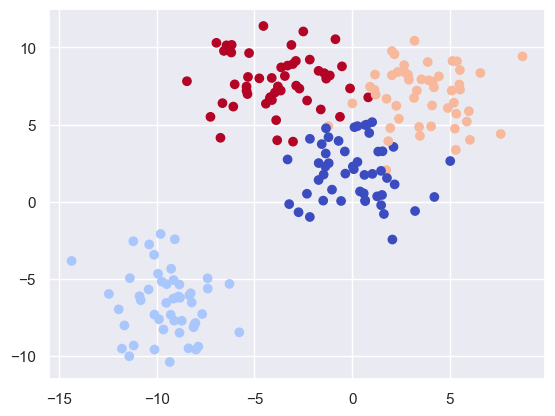

In [6]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='coolwarm')

### Model Training & Predicting

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(5)

In [9]:
kmeans.fit(data[0])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in

KMeans(n_clusters=5)

In [10]:
kmeans.cluster_centers_

array([[-9.18960987, -8.53584776],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735],
       [-9.67203831, -5.13061964]])

In [11]:
kmeans.labels_

array([1, 3, 2, 3, 3, 4, 3, 2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 2, 4, 1, 4, 2,
       2, 0, 1, 0, 0, 2, 3, 3, 1, 0, 3, 2, 2, 1, 4, 4, 0, 2, 4, 1, 1, 1,
       2, 3, 1, 2, 0, 2, 2, 1, 3, 2, 4, 1, 2, 2, 1, 3, 0, 3, 4, 1, 3, 2,
       4, 3, 3, 4, 3, 2, 4, 2, 4, 3, 3, 2, 1, 2, 2, 4, 3, 4, 2, 2, 2, 1,
       2, 4, 0, 4, 4, 2, 2, 0, 3, 1, 4, 3, 2, 4, 2, 2, 3, 2, 4, 3, 0, 4,
       3, 1, 1, 3, 0, 3, 1, 1, 3, 1, 2, 1, 2, 1, 2, 3, 1, 2, 0, 1, 1, 1,
       2, 0, 4, 1, 3, 1, 3, 2, 0, 3, 4, 1, 1, 3, 2, 0, 1, 1, 1, 1, 2, 3,
       2, 1, 3, 3, 3, 2, 3, 2, 2, 1, 4, 1, 2, 3, 1, 2, 3, 2, 1, 3, 2, 1,
       3, 3, 0, 3, 1, 0, 0, 1, 4, 0, 4, 0, 0, 2, 4, 3, 3, 1, 4, 2, 3, 3,
       4, 2], dtype=int32)

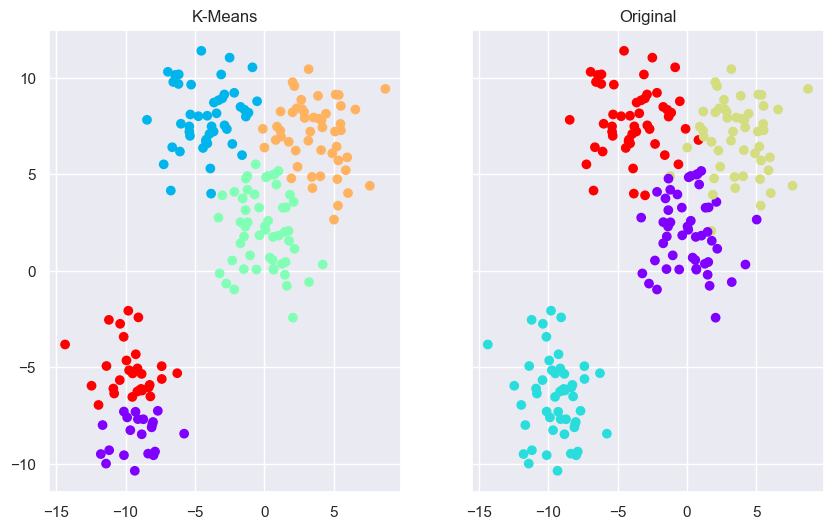

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K-Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

==========

## K-Means Clustering | Full Case-study (Mall Customers)

### Importing Dataset

In [13]:
mall = pd.read_csv('data/mall-customers.csv')
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Extracting Features

In [14]:
X = mall.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Exploring Data

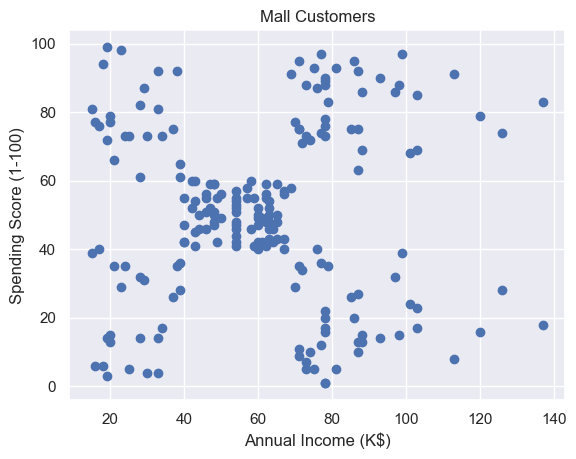

In [15]:
plt.scatter(X[:,0], X[:,1])
plt.title('Mall Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Model Training & Prediction

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [18]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [19]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [20]:
kmeans.inertia_

44448.45544793371

In [21]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [22]:
mall_clustered = mall.copy()
mall_clustered['Clusters'] = y_kmeans
mall_clustered

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


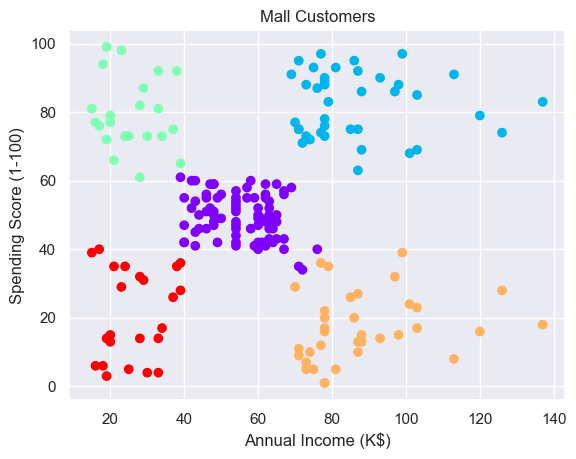

In [23]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title('Mall Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Finding the Optimal Number of Clusters (Elbow / Knee Method)

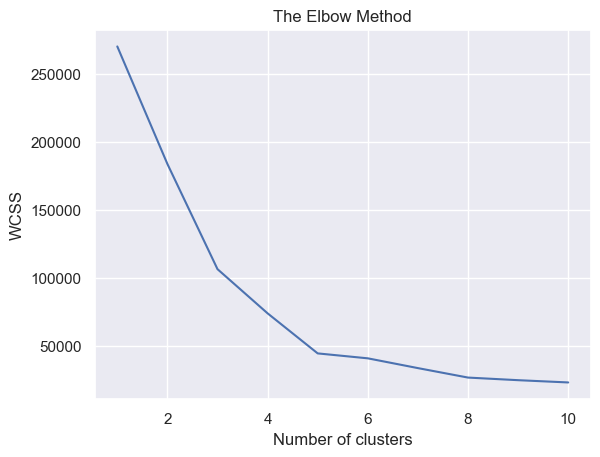

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Final Model

In [25]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising Clusters

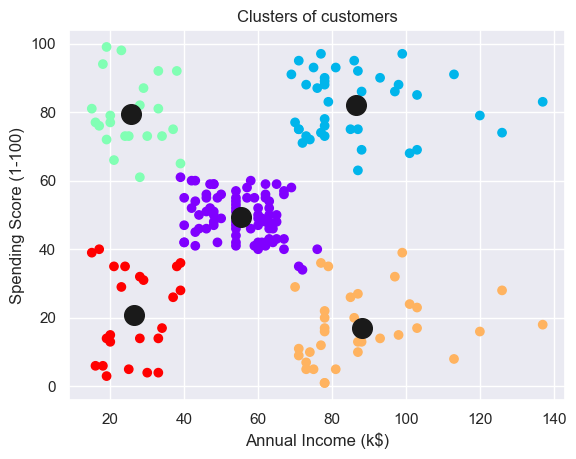

In [26]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'k')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

==========

# THANK YOU!